___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** Andre Yahir Gonzalez Cuevas Sergio Daniel Dueñas Godinez

**Fecha:** 07 de Mayo del 2024.

**Expediente** : 739922, 739300
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Andr3Glez/proyecto_modulo1

# Proyecto Final

> De la base seleccionada debe de poder aplicarse cada uno de las tres secciones del curso.
> 1. Predicción de series de tiempo lineal (SARIMAX).  
> 2. Predicción de series de tiempo no lineal (MLP, CNN, LSTM, etc).
> 3. Clasificación de series de tiempo. Si la base de datos no tiene información suficiente para poder realizar clasificación, se puede utilizar otra base de datos diferente para aplicar las técnicas vistas para clasificar series de tiempo

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.
 Modelado y pronóstico de precios de Bitcoin utilizando técnicas de aprendizaje profundo.

### 1.2 Objetivos.

- #### 1.1 Objetivo general
>    -  Desarrollar un modelo de aprendizaje profundo capaz de pronosticar de manera precisa los precios futuros de Bitcoin utilizando datos históricos.
- #### 1.2 Objetivos específicos

>    -  Recopilar y procesar datos históricos de precios de Bitcoin de fuentes confiables.
>    -  Explorar y visualizar las características y patrones presentes en los datos de series de tiempo de precios de Bitcoin.
>    -  Implementar y evaluar diferentes arquitecturas de redes neuronales, redes neuronales convolucionales (CNN) y combinaciones de estas (CNN-LSTM, ConvLSTM).
>    -  Comparar el desempeño de los diferentes modelos utilizando métricas de evaluación apropiadas.
>    -  Analizar los factores que influyen en los patrones de precios de Bitcoin e incorporarlos en el modelo, si es posible.

### 1.3 Definición del problema.
> Bitcoin es una criptomoneda descentralizada y digital que ha ganado una gran popularidad en los últimos años. Sin embargo, su precio es altamente volátil y difícil de predecir debido a factores como la especulación, la adopción, los eventos regulatorios y los avances tecnológicos. Predecir con precisión los precios futuros de Bitcoin puede ser beneficioso para inversionistas, comerciantes y empresas que operan en el mercado de criptomonedas.


>En este proyecto, se abordará el problema de pronosticar los precios futuros de Bitcoin utilizando técnicas de aprendizaje profundo y datos históricos de precios. Se explorarán diferentes arquitecturas de redes neuronales, como redes neuronales convolucionales (CNN) y combinaciones de estas (CNN-LSTM, ConvLSTM), para capturar los patrones complejos y las dependencias temporales presentes en los datos de series de tiempo de precios de Bitcoin.


>Se asumirá que los precios futuros de Bitcoin dependen de los precios pasados y, posiblemente, de otros factores como el volumen de transacciones, el sentimiento del mercado y los eventos relevantes. Se simulará el proceso de negocio de pronóstico de precios de Bitcoin, simulando que somos brokers y nuestro trabajo es darle a nuestros clientes predicciones sobre Bitcoin para futuras inversiones. Se logrará identificando los "nodos" o "escenarios" clave, como la recopilación de datos, el procesamiento y la preparación de datos, el entrenamiento y la evaluación de modelos.
### 1.4 Nodos y variables que se decidieron simular y porqué
> Las variables que se deicidieron utilizar fueron Timestamp, Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price, ya que creemos que son las más importantes a la hora de tratar de predicir su precio.

### 1.5 Obtención de bases de datos
> La base de datos fue rescata de Zielak (2021, April). Bitcoin Historical Data. La cual contiene datos historicos del bitcoin como los OHLC. Los datos van de minuto a minuto a partir del 2012 hasta 2021.


# Codigo

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import datetime
from datetime import datetime
from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import MonthEnd

import statsmodels.api as sm
from scipy import stats
import itertools

import plotly.express as px

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

import gc
import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

### EDA

In [127]:
#from google.colab import drive
#drive.mount('/content/drive')

In [128]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos/Proyecto/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")

In [129]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [130]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


Las columnas de `Open` y `Close` indican el precio de apertura y cierre en un día particular.

Las columnas de `High` y `Low` proporcionan el precio más alto y más bajo en un día particular, respectivamente.

La columna de `Volume` nos informa sobre el volumen total negociado en un día particular.

La columna `Weighted_Price` es un punto de referencia de comercio utilizado por los traders que proporciona el precio ponderado al que un valor ha sido negociado a lo largo del día, basado tanto en el volumen como en el precio. Es importante porque brinda a los traders una visión tanto de la tendencia como del valor de un valor.

Cada fila presenta un intervalo de comercio de 1 minuto. Los campos NaN representan marcas de tiempo sin ningún comercio ocurriendo. La mayoría de los campos NaN están presentes muy temprano en el conjunto de datos. Los bitcoins eran en su mayoría desconocidos en este período, lo que significa que no hubo muchos intercambios.

Al observar la columna de `Timestamp`, vemos que necesitamos convertirla a formato de fecha

#### Conversion de Tiempo

In [132]:
df['Timestamp'] = df['Timestamp'].apply(datetime.fromtimestamp)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 01:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 01:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 01:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora visualizemos nuestra serie de tiempo

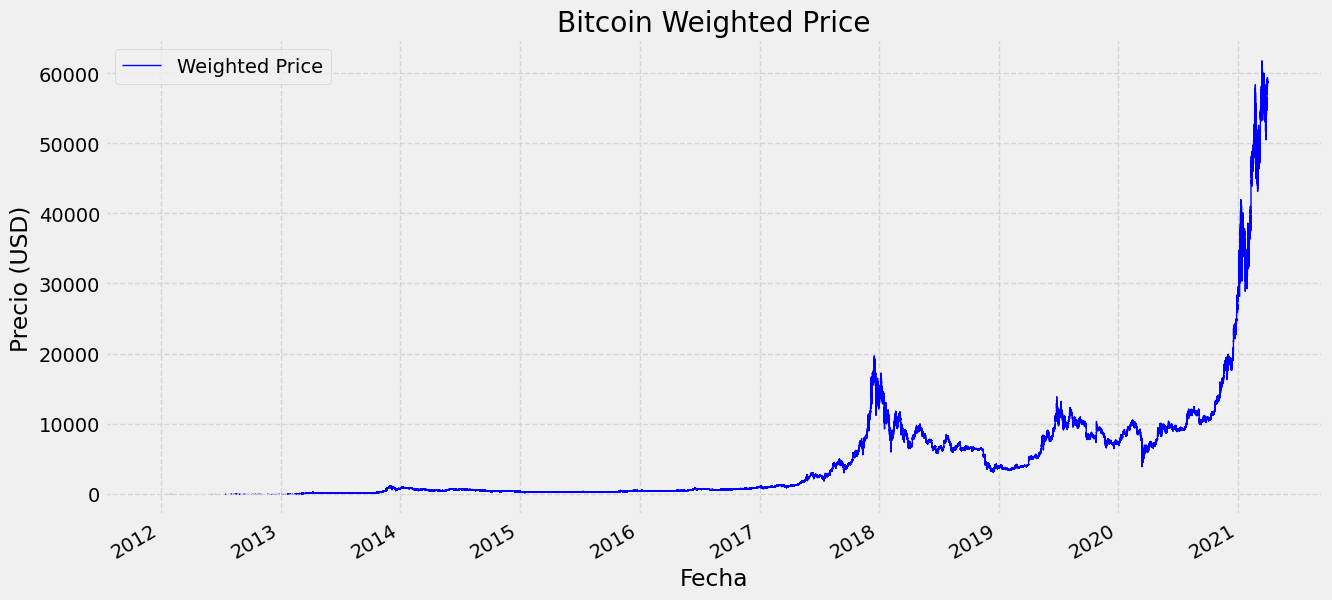

In [133]:
# Establecer el índice en la columna "Timestamp" y trazar el gráfico de "Weighted_Price"
df.set_index("Timestamp")["Weighted_Price"].plot(figsize=(14, 7),
                                                       title="Bitcoin Weighted Price",
                                                       xlabel="Timestamp",
                                                       ylabel="Price (USD)",
                                                       color="blue",
                                                       linestyle="-",
                                                       linewidth=1)

# Añadir etiquetas a los ejes
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")

# Mostrar la leyenda
plt.legend(["Weighted Price"])

# Mostrar la grilla para una mejor referencia visual
plt.grid(True, linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

#### Valores Faltantes
Ahora revisamos como se comportan los daos faltantes previamente mencionados

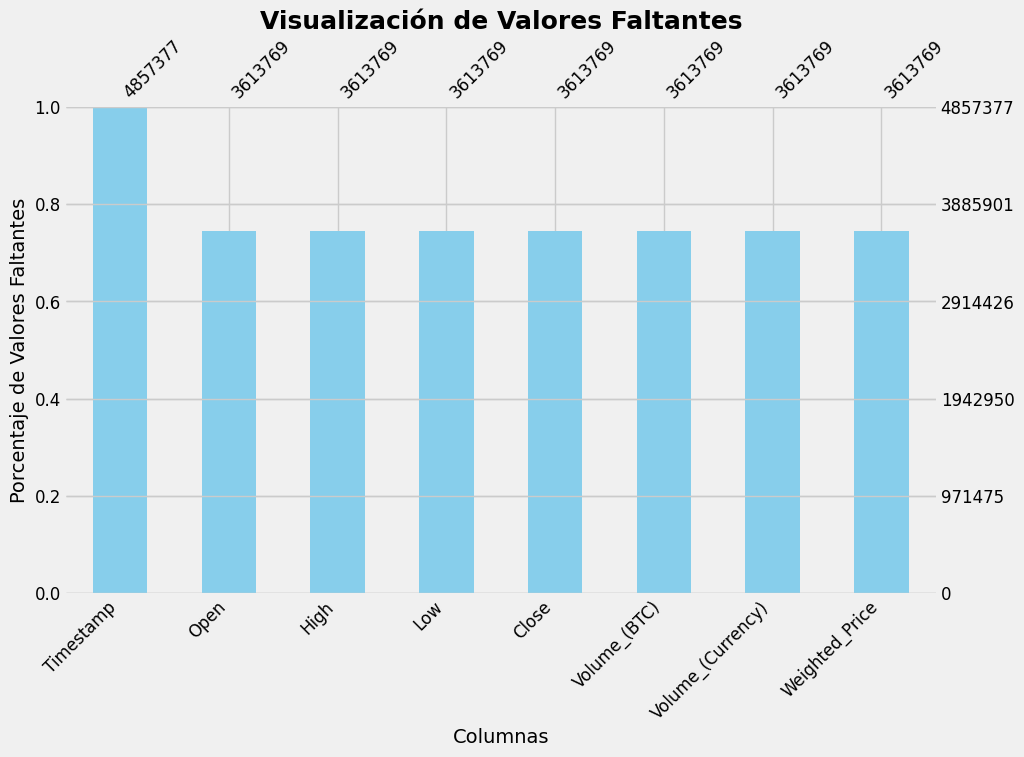

In [134]:
# Crear una figura y ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Utilizar Missingno para visualizar los datos faltantes en el DataFrame df
msno.bar(df, ax=ax, color='skyblue', fontsize=12)

# Añadir título al gráfico
ax.set_title("Visualización de Valores Faltantes", fontsize=18, weight="bold")

# Añadir etiquetas a los ejes
ax.set_xlabel("Columnas", fontsize=14)
ax.set_ylabel("Porcentaje de Valores Faltantes", fontsize=14)

# Añadir una línea horizontal en el 5% para resaltar áreas críticas
ax.axhline(y=5, color='red', linestyle='--', linewidth=1.5)

# Mostrar la trama
plt.show()

In [135]:
# Calcular el número total de valores faltantes y el porcentaje de valores faltantes para cada columna
nan_values = df.isnull().sum()
nan_por = (nan_values / len(df)) * 100

# Crear una tabla de resumen de valores faltantes
nan_table = pd.DataFrame({'Total de Valores Faltantes': nan_values, 'Faltantes %': nan_por})

# Renombrar las columnas para una mejor claridad
nan_table.rename(columns={'Total de Valores Faltantes': 'Total de Valores Faltantes', 'Faltantes %': 'Porcentaje de Faltantes'}, inplace=True)

# Mostrar la tabla de valores faltantes
nan_table

,Total de Valores Faltantes,Porcentaje de Faltantes
Timestamp,0,0.00000
Open,1243608,25.60246
High,1243608,25.60246
Low,1243608,25.60246
Close,1243608,25.60246
Volume_(BTC),1243608,25.60246
Volume_(Currency),1243608,25.60246
Weighted_Price,1243608,25.60246


Usaremos la interpolación lineal, donde se asume una relación lineal entre los puntos de datos y utiliza valores no faltantes de puntos de datos adyacentes para calcular un valor para un punto de datos faltante.

In [136]:
def fill_missing(df):
    # Lista de columnas numéricas para las cuales se va a aplicar la interpolación
    numeric_columns = ['Open', 'Close', 'Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)', 'High', 'Low']

    # Aplicar interpolación lineal a las columnas numéricas
    df[numeric_columns] = df[numeric_columns].interpolate()

    # Imprimir la suma de valores faltantes después de la interpolación
    print(df.isnull().sum())

In [137]:
fill_missing(df)

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


#### Time Resampling

Para poder detectar tendencias como buscamos haremos un remuestro temporal.

In [138]:
def resample_data(df):
    # Convertir 'Timestamp' a datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Establecer 'Timestamp' como el índice
    df.set_index('Timestamp', inplace=True)

    # Remuestrear los datos a frecuencia horaria y calcular la media
    df_por_hora = df.resample('1H').mean()

    # Restablecer el índice para convertir 'Timestamp' en una columna regular
    df_por_hora = df_por_hora.reset_index()

    return df_por_hora

In [139]:
# Llamar a la función resample_data para remuestrear los datos por hora
df_hourly = resample_data(df)

df_hourly.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 02:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 03:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 04:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 05:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


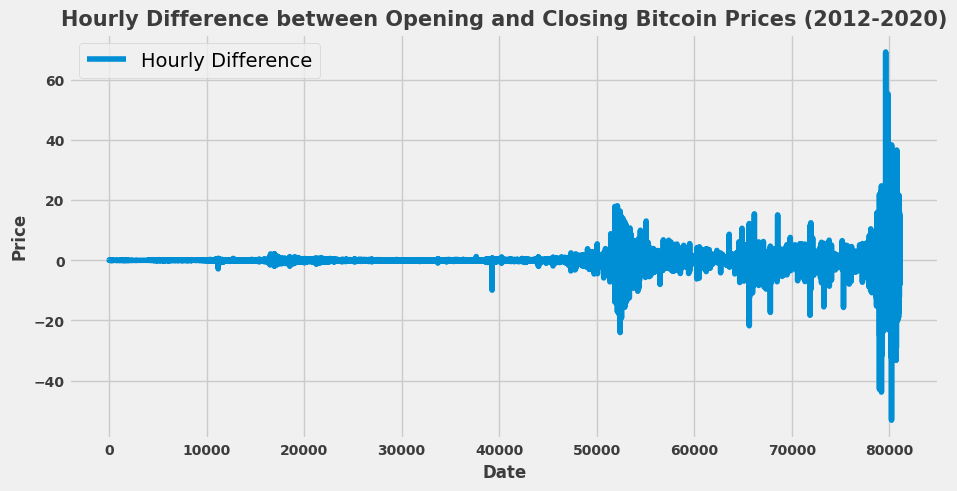

In [140]:
# Data
copia_df = df_hourly.copy()
copia_df["hourly_diff"] = copia_df["Close"] - copia_df["Open"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(copia_df.index, copia_df["hourly_diff"], label="Hourly Difference")
plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)
plt.xlabel("Date", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Price", fontsize=12, weight="bold", alpha=0.75)
plt.title("Hourly Difference between Opening and Closing Bitcoin Prices (2012-2020)", fontsize=15, weight="bold", alpha=0.75)

plt.legend()
plt.show()

In [141]:
def resample_data_dayly(df):
    # Convertir 'Timestamp' a datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Establecer 'Timestamp' como el índice
    df.set_index('Timestamp', inplace=True)

    # Remuestrear los datos a frecuencia horaria y calcular la media
    df_por_hora = df.resample('24H').mean()

    # Restablecer el índice para convertir 'Timestamp' en una columna regular
    df_por_hora = df_por_hora.reset_index()

    return df_por_hora

# Llamar a la función resample_data para remuestrear los datos por dia
df_daily = resample_data_dayly(df_hourly)

df_daily.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.501683,4.503458,4.501683,4.503458,13.319891,59.140401,4.502353
1,2012-01-01,4.869137,4.869137,4.869137,4.869137,9.084847,44.711634,4.869137
2,2012-01-02,5.041873,5.041873,5.041873,5.041873,15.139625,75.799424,5.041873
3,2012-01-03,5.167045,5.167045,5.167045,5.167045,6.015856,31.185542,5.167045
4,2012-01-04,5.388086,5.429860,5.388086,5.429860,14.459669,78.142918,5.403537


### SARIMAX

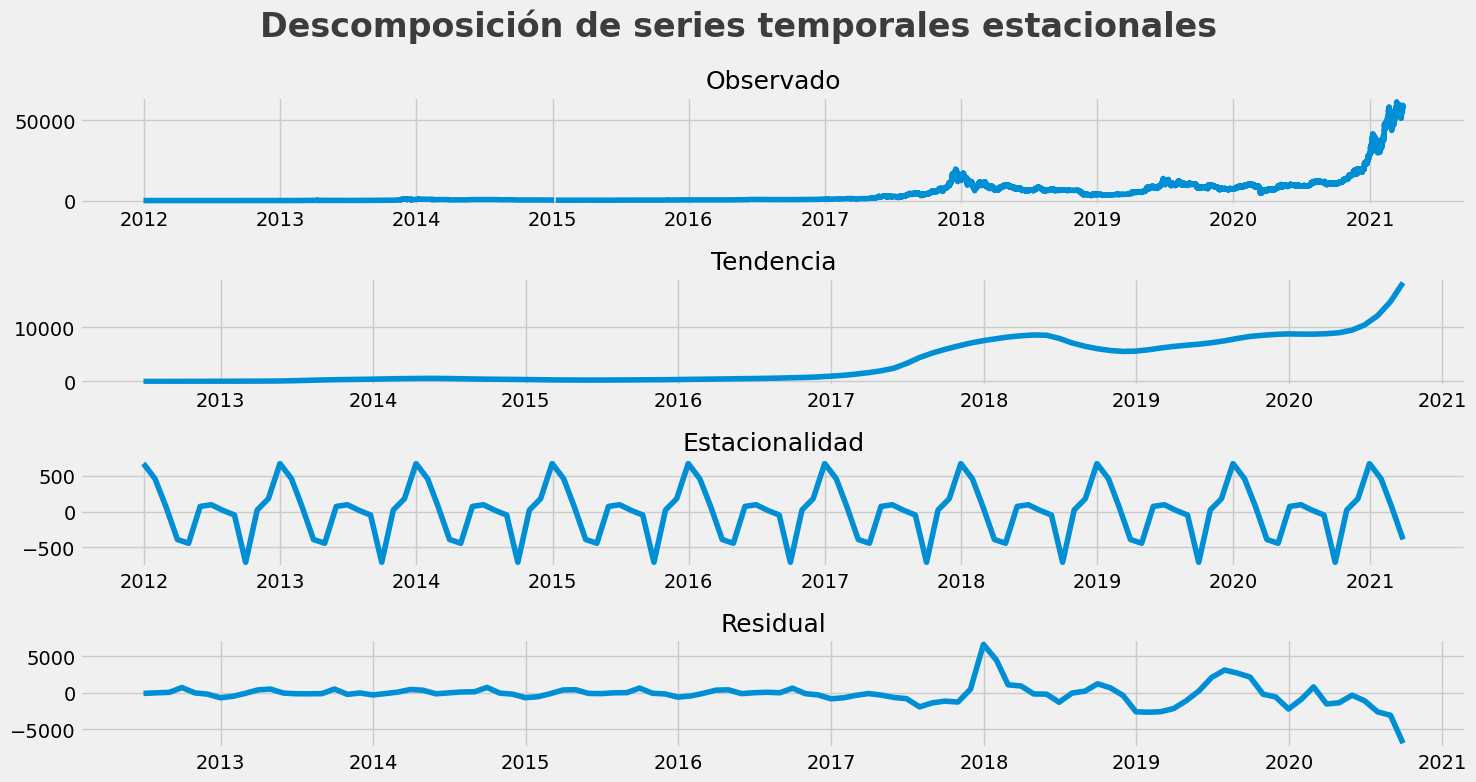

In [142]:
# Seasonal Decompose
plt.figure(figsize=(15, 8))

df_month = df.resample("M").mean()
dec = sm.tsa.seasonal_decompose(df_month["Weighted_Price"])

plt.subplot(411)
plt.plot(df_hourly["Weighted_Price"], label="Precio Ponderado")
plt.title("Observado", fontsize=18)

plt.subplot(412)
plt.plot(dec.trend, label="Tendencia")
plt.title("Tendencia", fontsize=18)

plt.subplot(413)
plt.plot(dec.seasonal, label="Estacionalidad")
plt.title("Estacionalidad", fontsize=18)

plt.subplot(414)
plt.plot(dec.resid, label="Residual")
plt.title("Residual", fontsize=18)

plt.suptitle("Descomposición de series temporales estacionales", fontsize=24, weight="bold", alpha=0.75)
plt.tight_layout()

plt.show()


Podemos ver a partir de las visualizaciones que:

- Los precios de Bitcoin están experimentando una fuerte tendencia hacia arriba.
- 
Hay algunos elementos estacionales en el precio (+- 500
- 
La mayor parte del ruido en los datos se generó durantel momento donde el tema estaba en tendencia en 2018-2019.

In [143]:
first_diff = df_month["Weighted_Price"].diff()
print("Dicky-Fuller test de estacionalidad - p: %f" % sm.tsa.adfuller(first_diff[1:])[1])
print("La serie es estacionaria")


df_month["Auto_Diff"] = first_diff

Dicky-Fuller test de estacionalidad - p: 0.013280
La serie es estacionaria


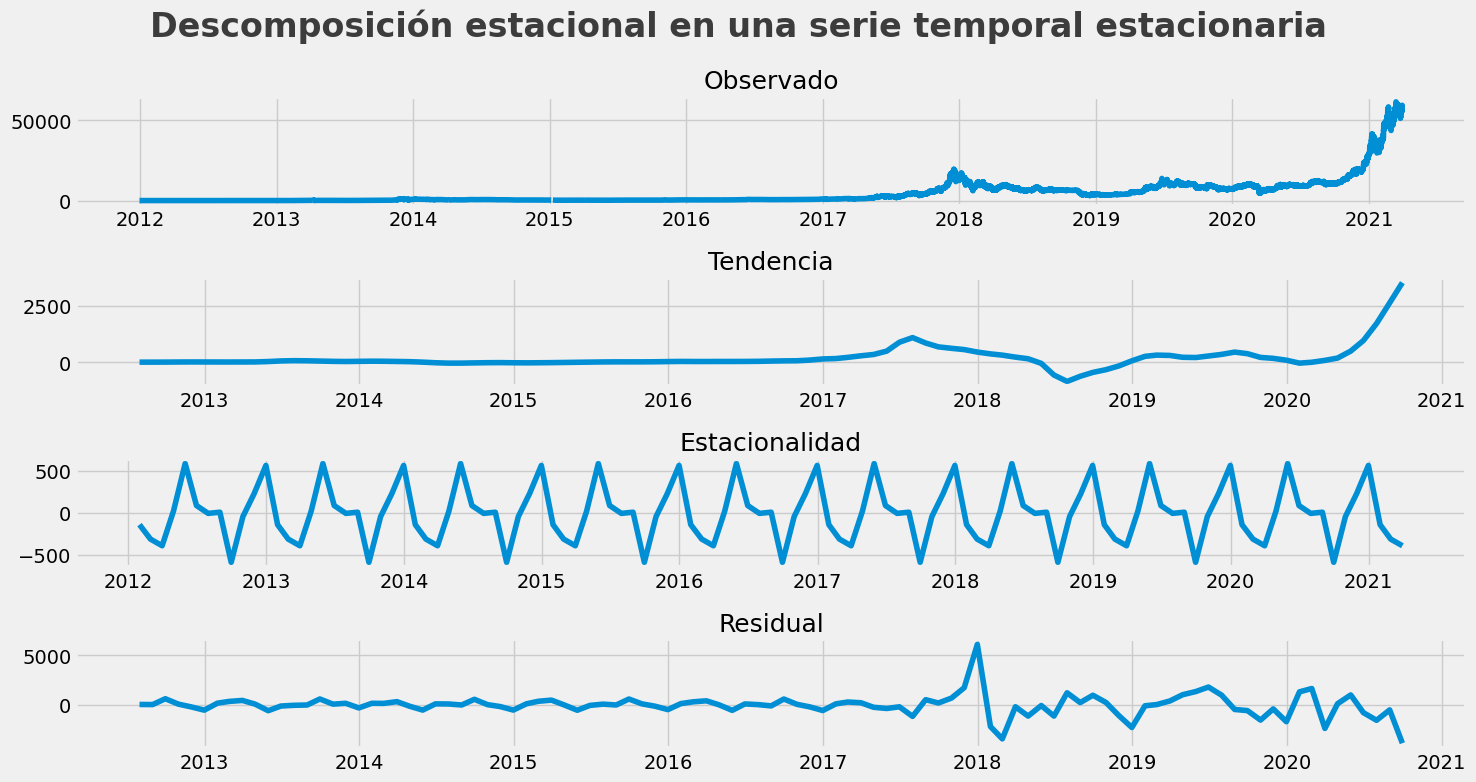

In [144]:
# Descomposición estacional en una serie estacionaria
seasonal_dec = sm.tsa.seasonal_decompose(df_month["Auto_Diff"][1:])

# Gráfico de descomposición estacional en una serie estacionaria
plt.figure(figsize=(15, 8))

plt.subplot(411)
plt.plot(df_hourly["Weighted_Price"], label="Precio Ponderado")
plt.title("Observado", fontsize=18)

plt.subplot(412)
plt.plot(seasonal_dec.trend, label="Tendencia")
plt.title("Tendencia", fontsize=18)

plt.subplot(413)
plt.plot(seasonal_dec.seasonal, label="Estacionalidad")
plt.title("Estacionalidad", fontsize=18)

plt.subplot(414)
plt.plot(seasonal_dec.resid, label="Residual")
plt.title("Residual", fontsize=18)

plt.suptitle("Descomposición estacional en una serie temporal estacionaria", fontsize=24, weight="bold", alpha=0.75)
plt.tight_layout()

plt.show()

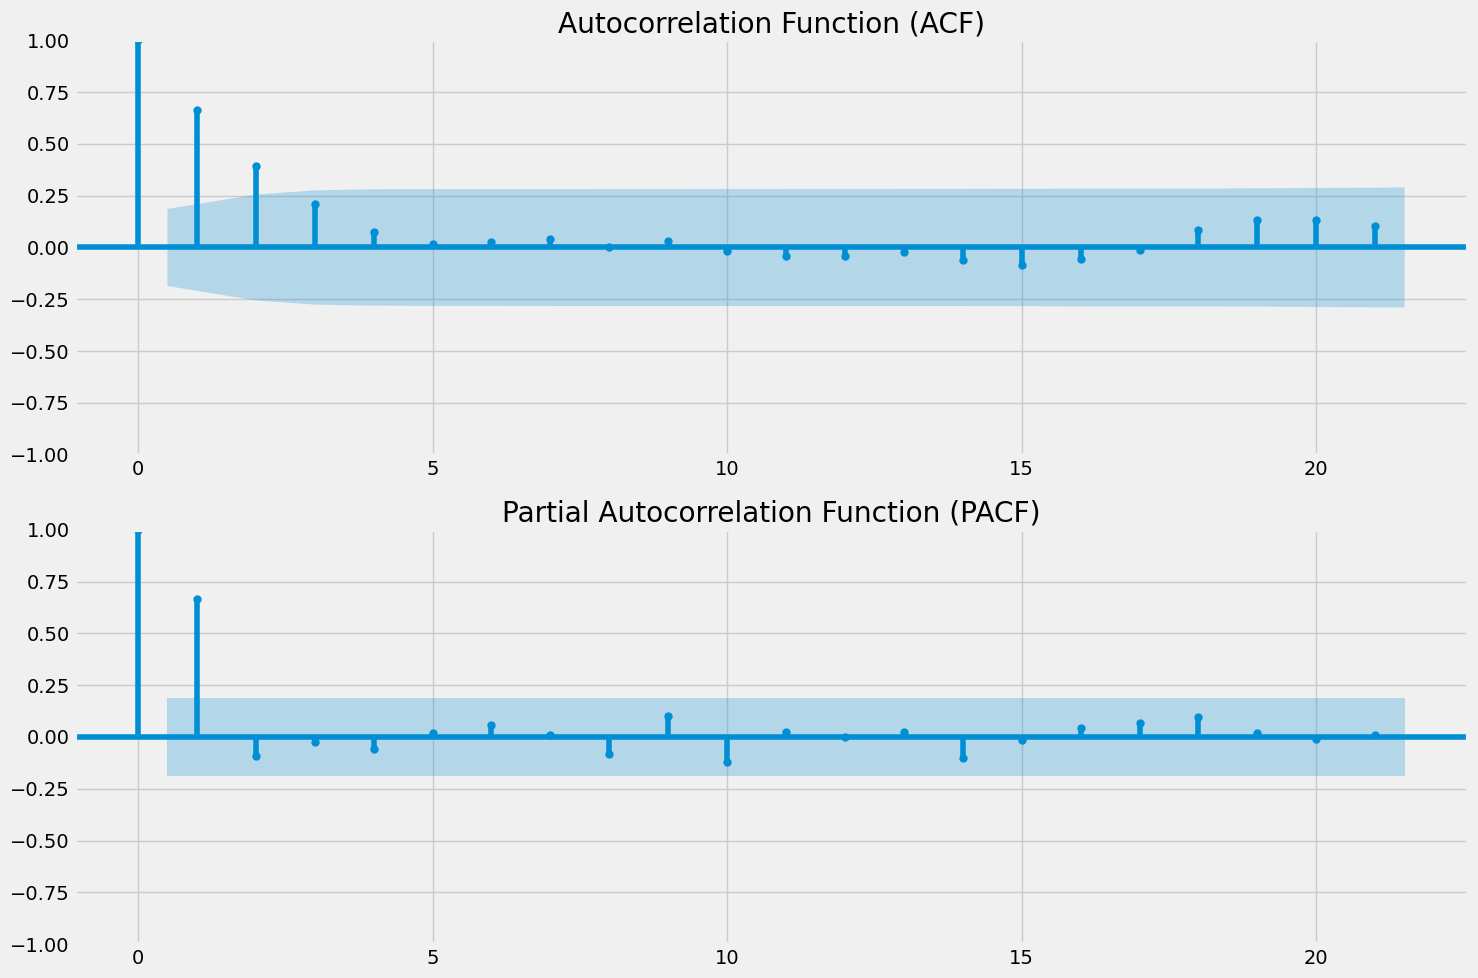

In [145]:
plt.figure(figsize=(15, 10))

plt.subplot(211)
sm.graphics.tsa.plot_acf(first_diff[1:], ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(212)
sm.graphics.tsa.plot_pacf(first_diff[1:], ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()

plt.show()

#### Modelo

In [146]:
#Construir todas las posibles combinaciones de parametros
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [147]:
def sarimax_function(data, pdq, s_pdq):
    """
    Función que utiliza un enfoque de fuerza bruta para aplicar todas las combinaciones posibles de pdq y evaluar el modelo.

    Parámetros:
    - data: Serie temporal para modelar.
    - pdq: Lista de tuplas que contienen los valores (p, d, q) para el modelo ARIMA.
    - s_pdq: Lista de tuplas que contienen los valores (P, D, Q, S) para el componente estacional del modelo SARIMA.

    Retorna:
    - result_list: Lista que contiene todas las combinaciones de parámetros (pdq y s_pdq) y los valores de AIC correspondientes.
    - results: Último modelo ajustado.
    """

    result_list = []  # Lista para almacenar los resultados de cada combinación de parámetros
    for param in pdq:
        for s_param in s_pdq:
            # Crear modelo SARIMAX con los parámetros actuales
            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
                                               enforce_invertibility=False, enforce_stationarity=False)
            # Ajustar el modelo a los datos
            results = model.fit()
            # Almacenar los resultados (parámetros, AIC) en result_list
            result_list.append([param, s_param, results.aic])
            # Imprimir información sobre los parámetros y el AIC para el modelo actual
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param, s_param, results.aic))

    # Retornar la lista de resultados y el último modelo ajustado
    return result_list, results


In [148]:
result_list,results = sarimax_function(df_month["Weighted_Price"],pdq,seasonal_pdq)

gc.collect()

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04733D+01    |proj g|=  9.53726D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.537D-07   1.047D+01
  F =   10.473273720663371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 2348.013313428595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.86065D+00    |proj g|=  2.24642D-03

At iterate   20    f=  8.85872D+00    |proj g|=  3.01558D-02

At iterate   25    f=  8.75172D+00    |proj g|=  2.54897D-01

At iterate   30    f=  8.61097D+00    |proj g|=  3.97823D-02

At iterate   35    f=  8.48002D+00    |proj g|=  1.88338D-01

At iterate   40    f=  8.42442D+00    |proj g|=  1.33067D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     62      1     0     0   1.362D-05   8.424D+00
  F =   8.4242769394477772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA Parameters: (0, 0, 1) x: (1, 1, 1, 12). AIC: 1732.6477712621763
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95910D+00    |proj g|=  8.13500D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.135D-06   8.959D+00
  F =   8.9590992636860740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 0) x: (0, 0, 0, 12). AIC: 2008.8382350656807
RUNNING THE L-BFGS-B CODE

           * * *

Machine p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.13533D+00    |proj g|=  5.22568D-02

At iterate   25    f=  7.12085D+00    |proj g|=  2.56764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     32      1     0     0   6.788D-06   7.121D+00
  F =   7.1208460386026236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 0) x: (1, 1, 1, 12). AIC: 1601.0695126469877
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64776D+00    |proj g|=  1.42279D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.72295D+00    |proj g|=  3.39277D-02

At iterate   30    f=  7.72113D+00    |proj g|=  3.90510D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     36      1     0     0   1.221D-06   7.721D+00
  F =   7.7211327912805032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 0, 1, 12). AIC: 1737.5337452468327
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07282D+00    |proj g|=  3.50870D-03


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f=  6.85602D+00    |proj g|=  1.68476D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     43      1     0     0   2.381D-06   6.856D+00
  F =   6.8558754288511166     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 1, 1, 12). AIC: 1543.7160960626502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78039D+00    |proj g|=  1.05112D-04

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.04004D+00    |proj g|=  1.12075D-01

At iterate   15    f=  7.02727D+00    |proj g|=  1.36214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   7.295D-05   7.027D+00
  F =   7.0272669507730230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 1, 1, 12). AIC: 1582.107796973157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.57588D+00    |proj g|=  9.15476D-02



 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA Parameters: (1, 0, 1) x: (1, 0, 1, 12). AIC: 1730.3917294044363
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10055D+00    |proj g|=  3.67447D-01

At iterate    5    f=  6.98676D+00    |proj g|=  1.02859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   5.030D-05   6.987D+00
  F =   6.9867633429088229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 1, 0, 12). AIC: 1573.034988

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.86310D+00    |proj g|=  2.76827D-03

At iterate   15    f=  6.86245D+00    |proj g|=  3.55013D-02

At iterate   20    f=  6.85357D+00    |proj g|=  2.63841D-02

At iterate   25    f=  6.85315D+00    |proj g|=  3.34968D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   3.350D-06   6.853D+00
  F =   6.8531476915800864     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 0) x: (0, 1, 1, 12). AIC: 1541.1050829139394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.63105D+00    |proj g|=  7.03101D-04

At iterate   15    f=  7.63098D+00    |proj g|=  1.08960D-02

At iterate   20    f=  7.62952D+00    |proj g|=  1.85398D-02

At iterate   25    f=  7.62910D+00    |proj g|=  5.84048D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   5.840D-06   7.629D+00
  F =   7.6290956852748666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 1) x: (0, 0, 1, 12). AIC: 1716.91743350157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.78595D+00    |proj g|=  3.30620D-02

At iterate   10    f=  6.78362D+00    |proj g|=  6.63164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     21      1     0     0   6.631D-05   6.784D+00
  F =   6.7836159741469961     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 1, 1, 12). AIC: 1529.529978208927


31668

#### Resultados

In [149]:
#Guardamos los resultados y los ordenamos para ver el mejor
results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
59,"(1, 1, 1)","(0, 1, 1, 12)",1527.799231
63,"(1, 1, 1)","(1, 1, 1, 12)",1529.529978
51,"(1, 1, 0)","(0, 1, 1, 12)",1541.105083
31,"(0, 1, 1)","(1, 1, 1, 12)",1543.716096
55,"(1, 1, 0)","(1, 1, 1, 12)",1545.131807


In [150]:
model = sm.tsa.statespace.SARIMAX(df_month["Weighted_Price"], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84016D+00    |proj g|=  1.82784D-01

At iterate    5    f=  6.78486D+00    |proj g|=  2.69787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   6.268D-05   6.785D+00
  F =   6.7848179945364349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

 This problem is unconstrained.


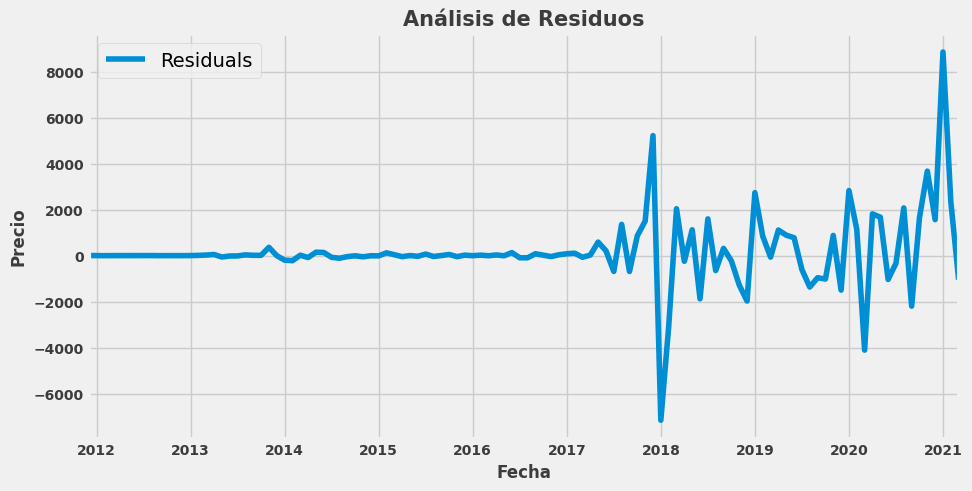

In [151]:
# Análisis de Residuos
plt.figure(figsize=(10, 5))

model.resid.plot(label="Residuals")
plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)
plt.legend()
plt.title("Análisis de Residuos", fontsize=15, weight="bold", alpha=0.75)


plt.show()

<Figure size 1800x1200 with 0 Axes>

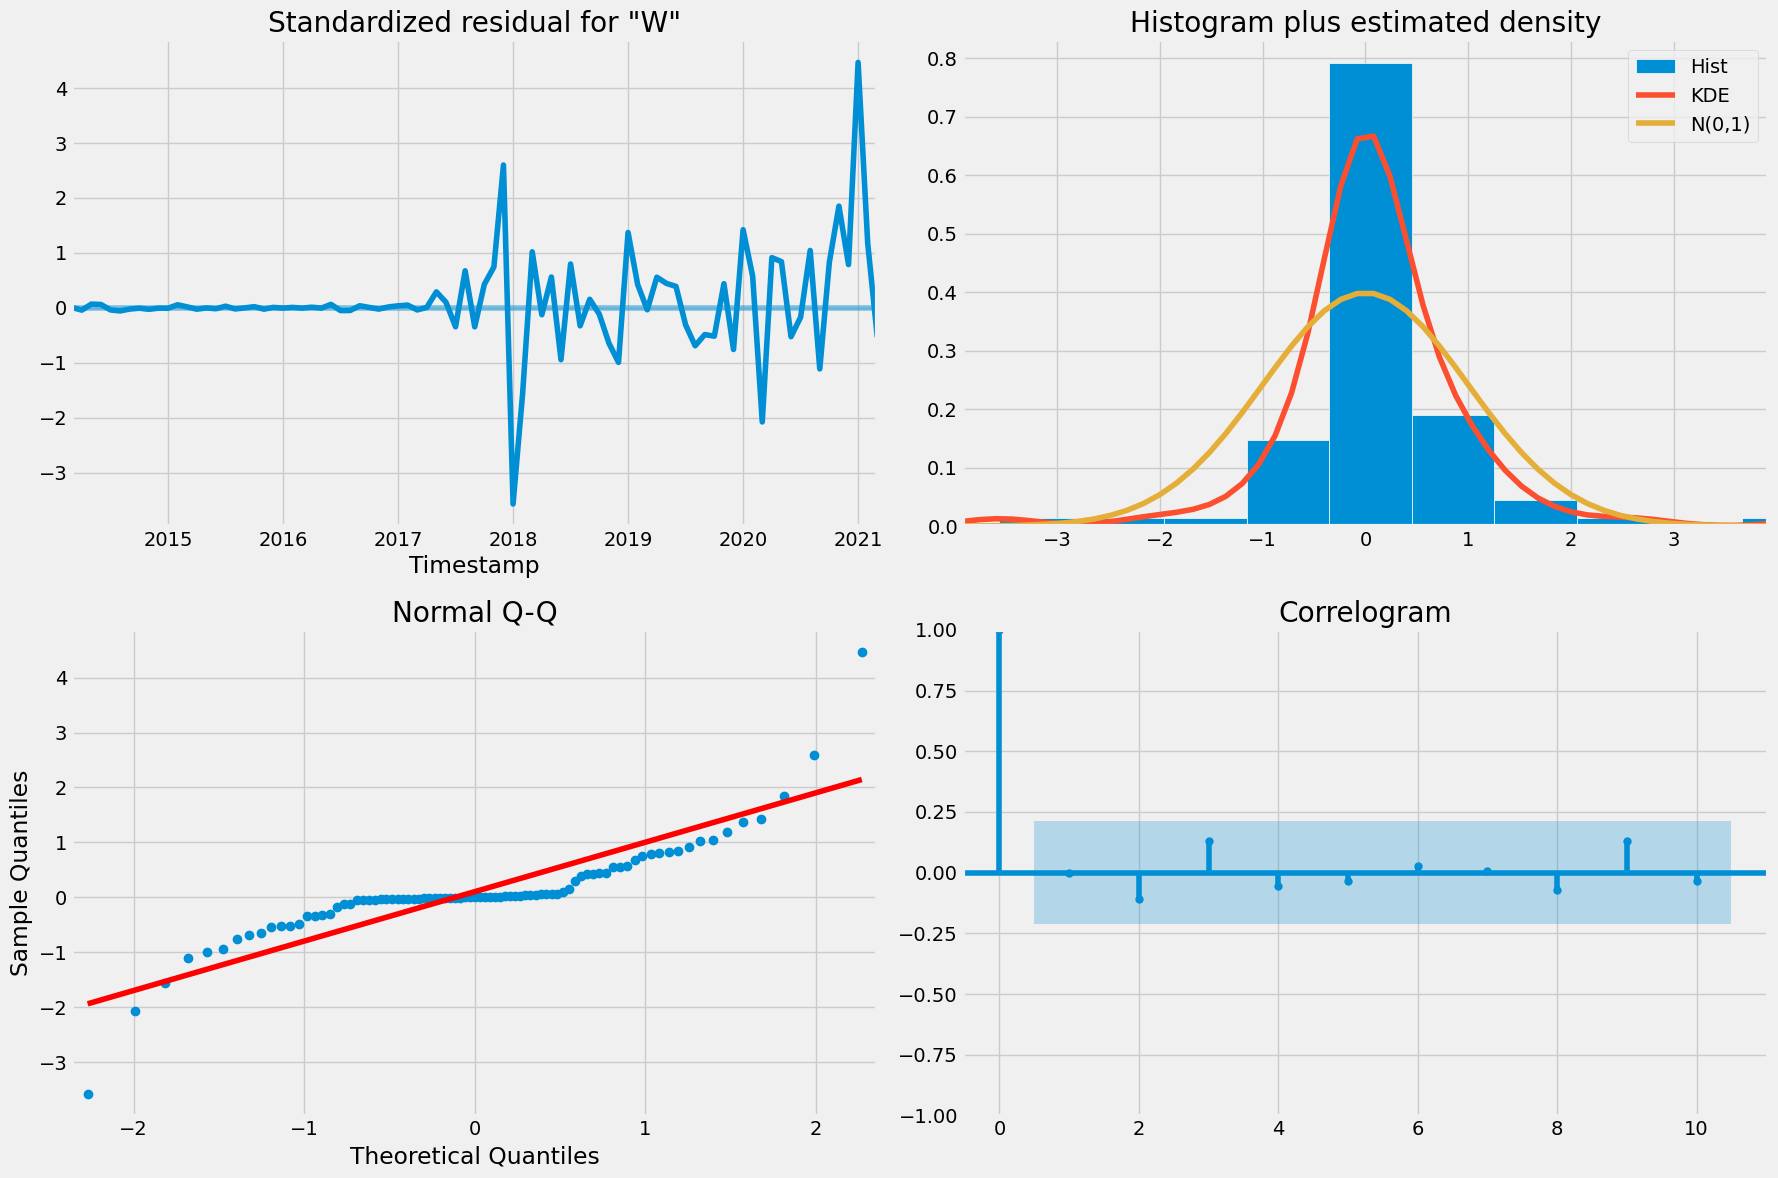

In [152]:
# Plot de los diagnósticos del modelo
plt.figure(figsize=(18, 12))

# Generando diagnósticos con más espacio entre ellos
model.plot_diagnostics(figsize=(18, 12))

plt.tight_layout()
plt.show()



#### Prediccion

In [153]:
df_month_prediction = df_month[["Weighted_Price"]]

df_month_prediction["Forcasting"] = model.predict(start=pd.to_datetime("2011-12-31"), end=pd.to_datetime("2020-04-30"))

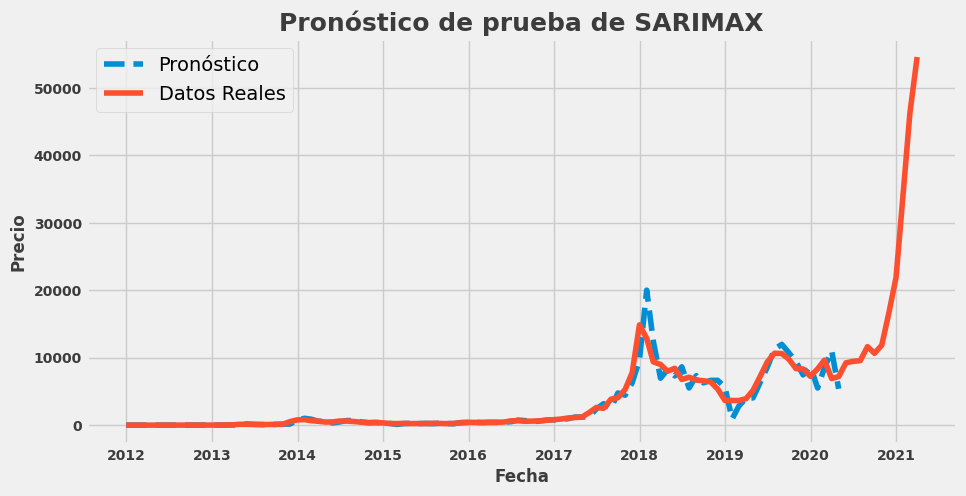

In [154]:
# Gráfico de pronóstico vs. datos reales
plt.figure(figsize=(10, 5))

plt.plot(df_month_prediction["Forcasting"], ls="--", label="Pronóstico")
plt.plot(df_month_prediction["Weighted_Price"], label="Datos Reales")

plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)

plt.legend()

plt.title("Pronóstico de prueba de SARIMAX", fontsize=18, weight="bold", alpha=0.75)

plt.show()


In [155]:
#Datetimeindex dates  to predict
future_dates = [df_month_prediction.index[-1] + DateOffset(months = x)for x in range(1,12)]
future_dates = pd.to_datetime(future_dates)  +  MonthEnd(0)
future = pd.DataFrame(index=future_dates)
df_month_prediction = pd.concat([df_month_prediction,future])

gc.collect()

28400

In [156]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2020-03-31"),end=pd.to_datetime("2021-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2020-03-31"),end=pd.to_datetime("2021-03-31"))
pred_ci = pred.conf_int()

gc.collect()

78

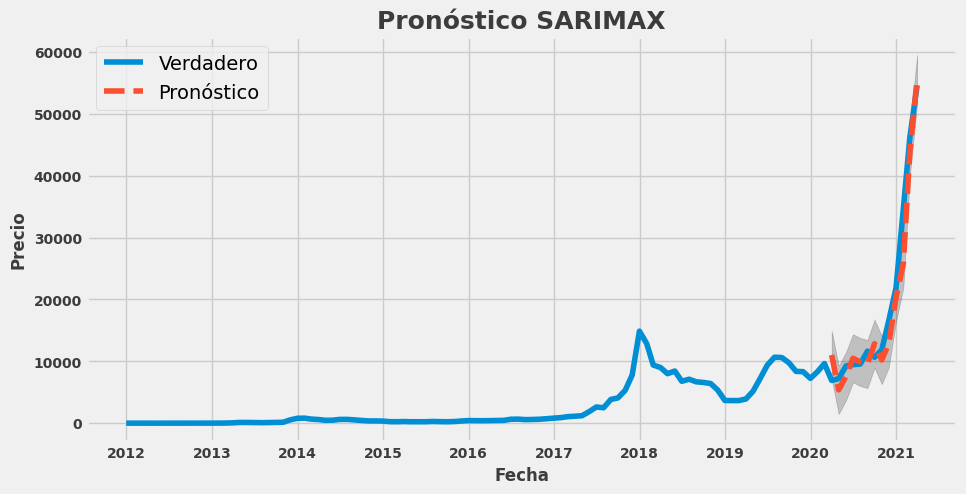

In [157]:
# Gráfico de Pronóstico vs. Datos reales
plt.figure(figsize=(10, 5))

plt.plot(df_month_prediction["Weighted_Price"], label="Verdadero")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Pronóstico")

# Ajustando las dimensiones del intervalo de confianza para que coincidan con el índice de df_month_prediction
index = df_month_prediction.index
pred_ci_adjusted = pred_ci.reindex(index)

plt.fill_between(index, pred_ci_adjusted.iloc[:, 0], pred_ci_adjusted.iloc[:, 1], color='k', alpha=.2)

plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)

plt.legend()

plt.title("Pronóstico SARIMAX", fontsize=18, weight="bold", alpha=0.75)

plt.show()


# Predicción de series de tiempo no lineal

### LSTM

In [158]:
fill_missing(df_daily)

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


Los datos de series temporales pueden ser ruidosos debido a las altas fluctuaciones en el mercado. Como resultado, se vuelve difícil evaluar una tendencia o un patrón en los datos.

Como estamos observando datos diarios, hay bastante ruido presente. Sería útil si pudiéramos promediar esto semanalmente, que es donde entra en juego una media móvil.

Una media móvil, o promedio móvil, es un método de transformación que ayuda a promediar el ruido de los datos. Funciona simplemente dividiendo y agregando los datos en ventanas según la función, como media(), mediana(), count(), etc. Para este ejemplo, usaremos una media móvil para 3, 7 y 30 d






In [159]:
def preprocess_data(df_daily):
    df = df_daily.set_index("Timestamp")
    df.reset_index(drop=False, inplace=True)

    lag_features = ["Open", "High", "Low", "Close", "Volume_(BTC)"]
    window1 = 3
    window2 = 7
    window3 = 30

    df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
    df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
    df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

    df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
    df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
    df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

    df_std_3d = df_rolled_3d.std().shift(1).reset_index()
    df_std_7d = df_rolled_7d.std().shift(1).reset_index()
    df_std_30d = df_rolled_30d.std().shift(1).reset_index()

    for feature in lag_features:
        df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
        df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
        df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
        df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
        df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
        df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

    df.fillna(df.mean(), inplace=True)
    df.set_index("Timestamp", drop=False, inplace=True)

    df["month"] = df.Timestamp.dt.month
    df["week"] = df.Timestamp.dt.isocalendar().week
    df["day"] = df.Timestamp.dt.day
    df["day_of_week"] = df.Timestamp.dt.dayofweek

    return df

In [160]:
df = preprocess_data(df_daily)

Nuestros datos ahora pueden reflejar mejor las tendencias

#### Modelo

Entrenaremos nuestro modelo en el período de entrenamiento, lo evaluaremos en el período de prueba. Aquí, optaremos por una validación basada en hold-out.

El hold-out se utiliza muy frecuentemente con datos de series temporales. En este caso, seleccionaremos todos los datos para 2020 como un hold-out y entrenaremos nuestro modelo en todos los datos de 2012 a 2019.

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
def split_data(df, split_date):
    
    df_train = df[df.Timestamp < split_date]
    df_test = df[df.Timestamp >= split_date]
    
    print(f'Tamaño de train: {df_train.shape}')
    print(f'Tamaño de test: {df_test.shape}')
    
    return df_train, df_test

In [163]:
df_train, df_test = split_data(df, "2020")

Tamaño de train: (2923, 42)
Tamaño de test: (455, 42)


In [164]:
price_series = df_daily.reset_index().Weighted_Price.values
price_series

array([4.50235266e+00, 4.86913732e+00, 5.04187271e+00, ...,
       5.56532910e+04, 5.74198449e+04, 5.86765975e+04])

In [165]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

Forma de train_data: (2923, 1)
Forma de test_data: (455, 1)


In [ ]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]
train_data.shape, test_data.shape

In [166]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [167]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [168]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (354, 100), (354,))

In [169]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(354, 100, 1)


In [170]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [171]:
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 1.1817e-04 - val_loss: 0.0049
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0030 - v

#### Resultados

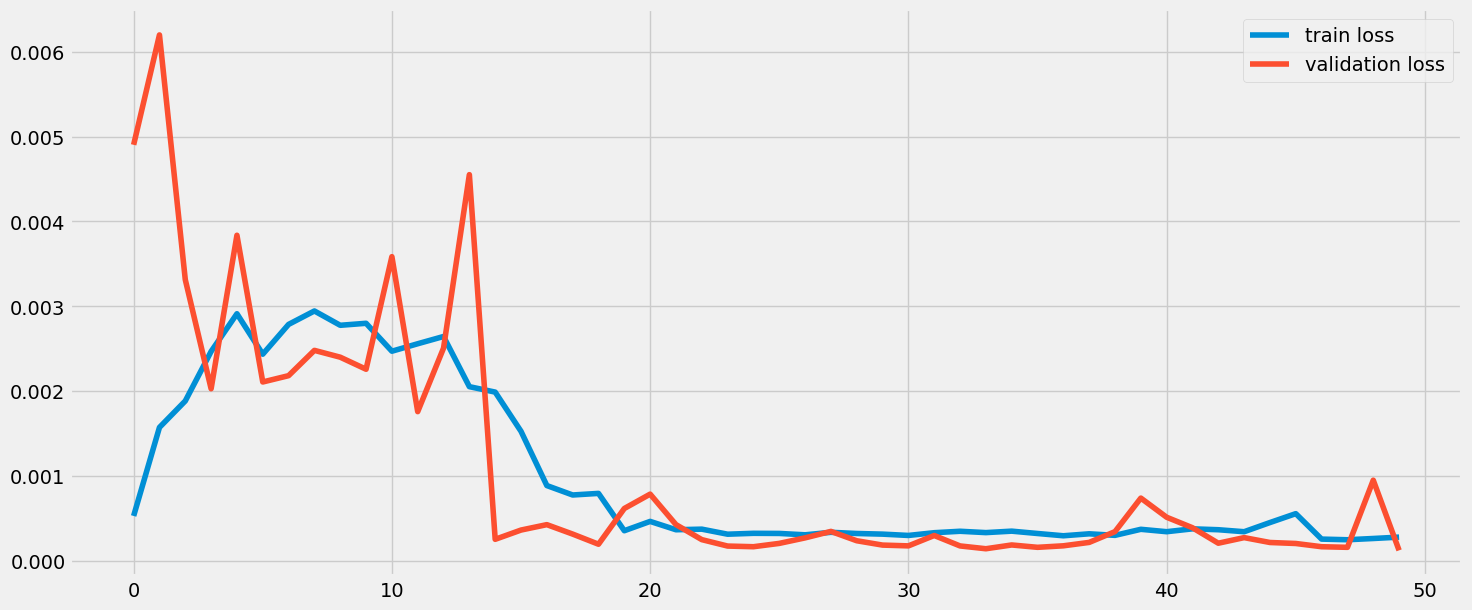

In [172]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [173]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [174]:
# Transformar a forma original

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

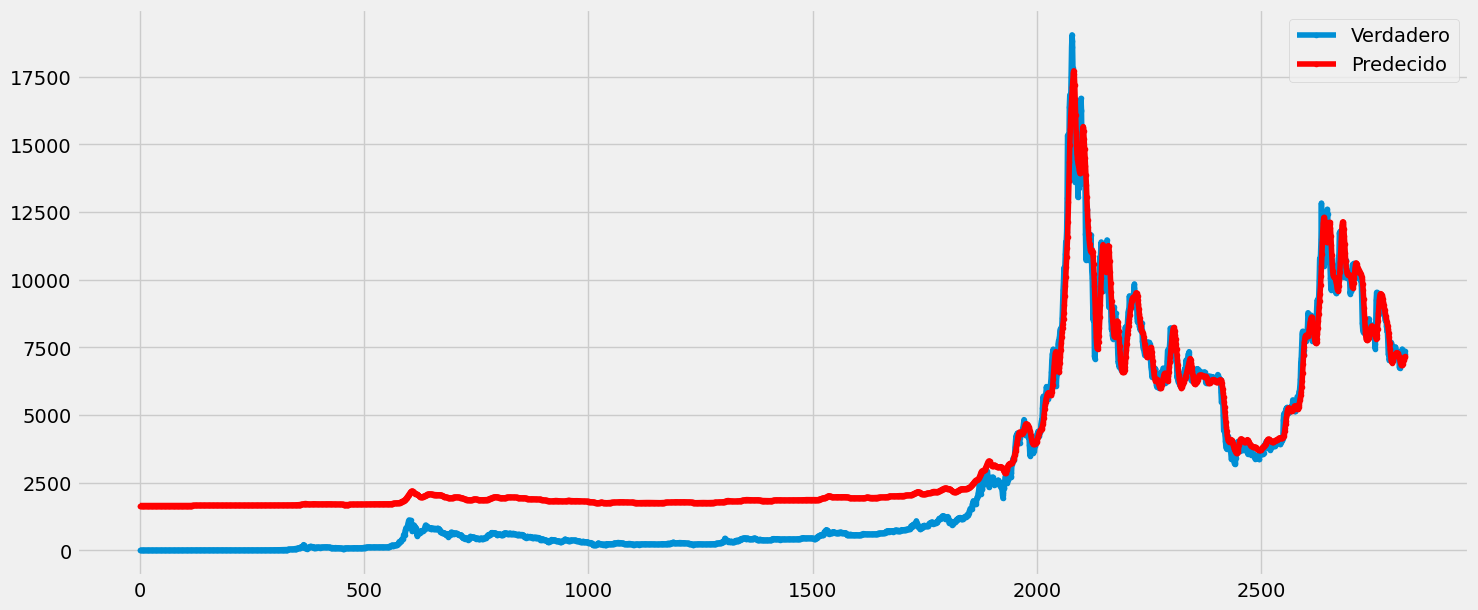

In [175]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Verdadero")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

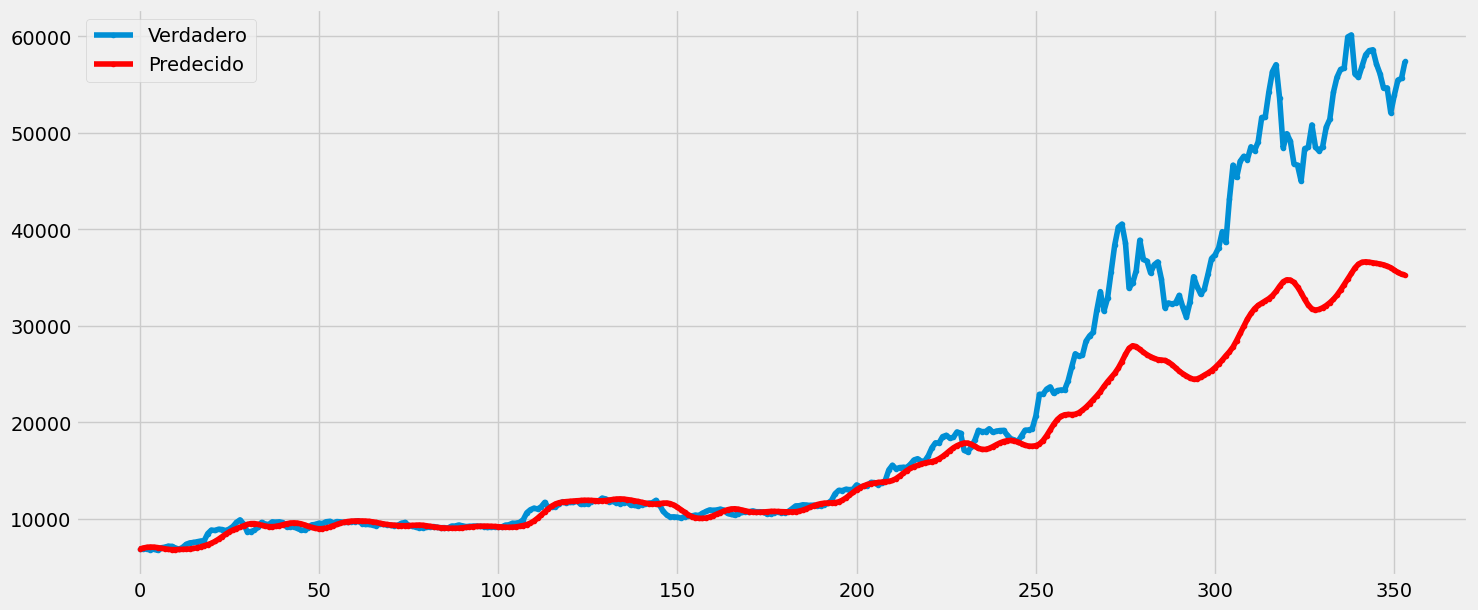

In [176]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Verdadero")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

In [177]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.021031332968230034
Train MAE: 0.13750246448236053
Test RMSE: 0.13130795529121178
Test MAE: 0.2640279639001839


#### Prediccion

In [178]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

(1, 100)

In [179]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [180]:
# Prediccion para 100 dias
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5914163]
101
1 day input [0.38744365 0.38833459 0.38830672 0.40428088 0.42798745 0.45072704
 0.446669   0.44830619 0.47241375 0.48157502 0.48749811 0.52546763
 0.55783974 0.52448431 0.5462591  0.59243765 0.63801001 0.66870956
 0.67410605 0.64146684 0.56391965 0.57268081 0.59398843 0.64641459
 0.61329802 0.61030509 0.59006771 0.60392262 0.60892819 0.58009874
 0.53020362 0.53825102 0.53643942 0.53863494 0.55133316 0.53093016
 0.51374829 0.53986122 0.58350806 0.56640314 0.5533295  0.56203226
 0.5873166  0.61477949 0.62111945 0.63348877 0.66103712 0.64248671
 0.71746008 0.77561144 0.75459162 0.78228002 0.79095057 0.7852906
 0.8072611  0.80055514 0.8155225  0.85768935 0.85916256 0.90189599
 0.93687347 0.94869625 0.89067269 0.80548518 0.82983104 0.81690791
 0.77791889 0.77555779 0.7481737  0.80419557 0.8063987  0.84491463
 0.80684767 0.80012388 0.8074753  0.841116   0.85470131 0.90093345
 0.92699454 0.94058727 0.94280289 0.99649191 1.         0.93298091
 0.92676693 0.94603604 0.9657428  0

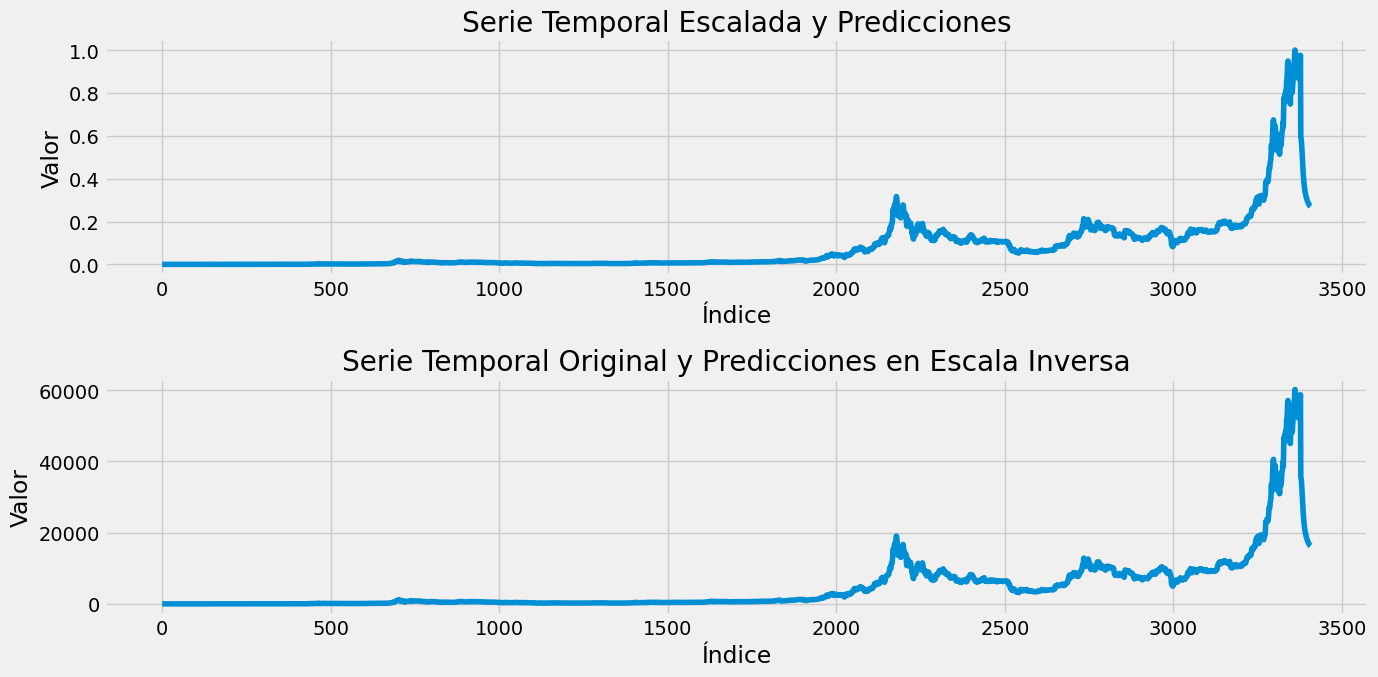

In [181]:
df_pre = price_series_scaled.tolist()
df_pre.extend(lst_output)

plt.figure(figsize=(14, 7))

# Gráfico de la serie temporal escalada y predicciones
plt.subplot(2, 1, 1)
plt.plot(df_pre)
plt.title('Serie Temporal Escalada y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

# Convertir las predicciones inversas a escala original
df_invscaled = scaler.inverse_transform(df_pre)

# Gráfico de la serie temporal original y predicciones en escala inversa
plt.subplot(2, 1, 2)
plt.plot(df_invscaled)
plt.title('Serie Temporal Original y Predicciones en Escala Inversa')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()


## CNN

Como el preprocesamiento ya o hicimos, pasaremos directamente a el modelo

In [207]:
df = preprocess_data(df_daily)
df_train, df_test = split_data(df, "2020")
price_series = df_daily.reset_index().Weighted_Price.values

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

Tamaño de train: (2923, 42)
Tamaño de test: (455, 42)
(2822, 100, 1)
(354, 100, 1)


In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Inicializar el modelo CNN
model_cnn = Sequential()

# Capa convolucional 1D
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))

# Capa convolucional 1D
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))

# Aplanar la salida de las capas convolucionales
model_cnn.add(Flatten())

# Capas densas
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))

# Capa de salida
model_cnn.add(Dense(1))

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [209]:
history_cnn = model_cnn.fit(X_train, y_train, validation_split=0.1, epochs = 100, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0954e-04 - val_loss: 0.0061
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0061
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0076
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0087
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

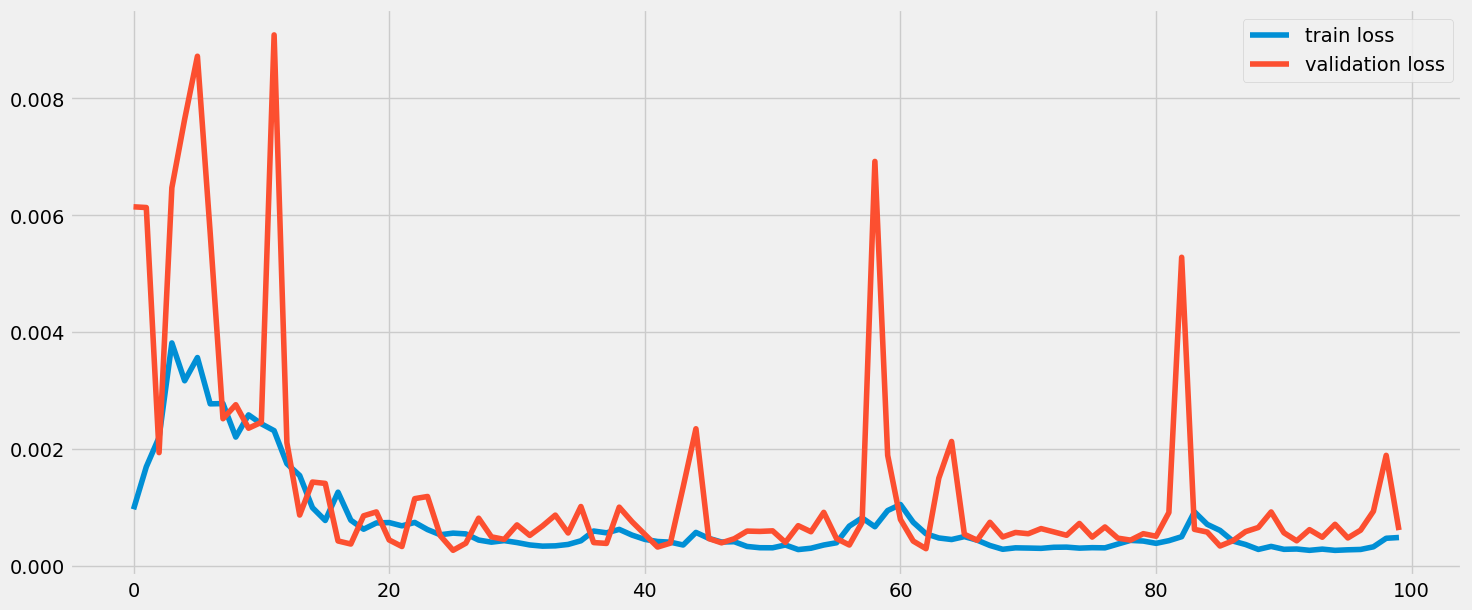

In [210]:
plt.figure(figsize=(16,7))
plt.plot(history_cnn.history["loss"], label= "train loss")
plt.plot(history_cnn.history["val_loss"], label= "validation loss")
plt.legend()

In [211]:
train_predict = model_cnn.predict(X_train)
test_predict = model_cnn.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step


In [212]:
# Transformar a forma original

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

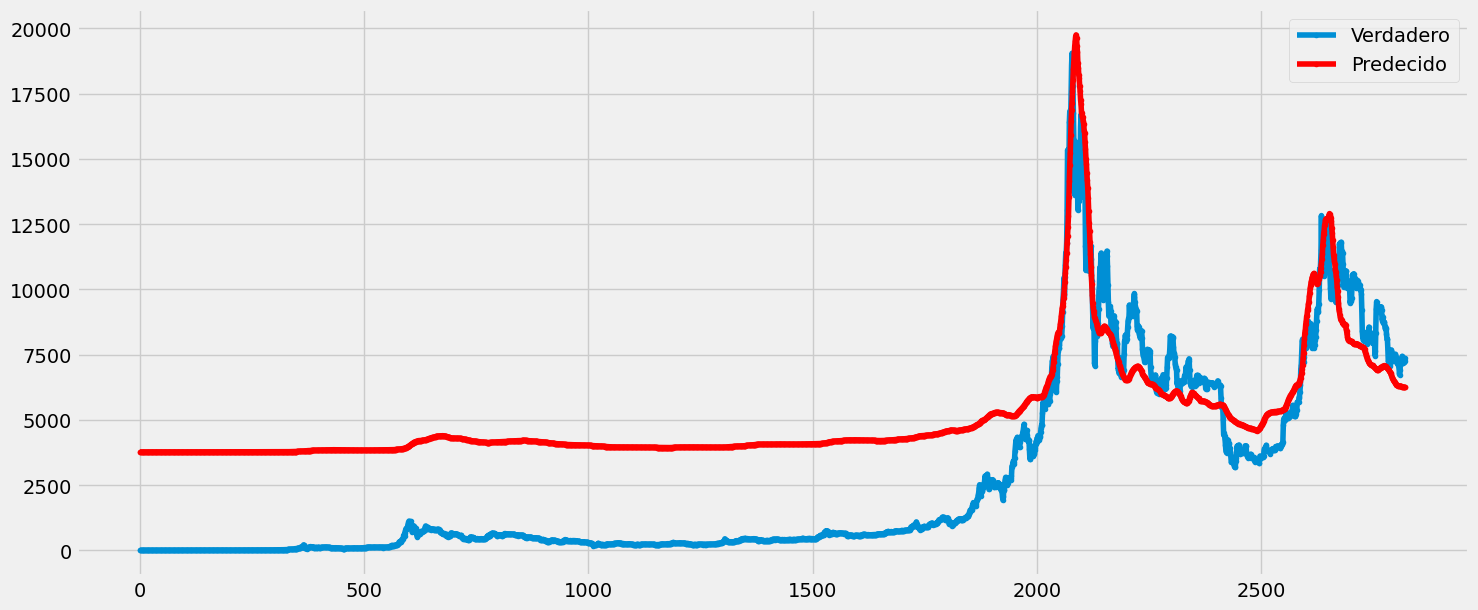

In [213]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Verdadero")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

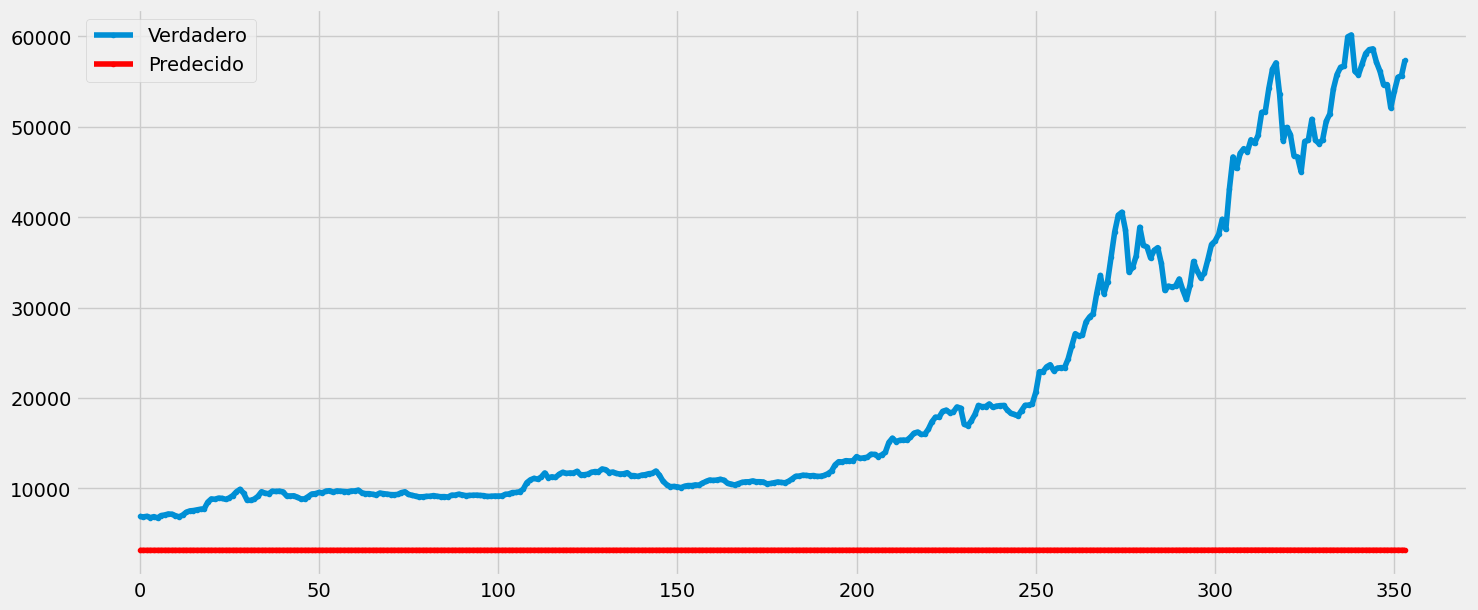

In [188]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Verdadero")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

In [214]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.05180491732233653
Train MAE: 0.21842942994559106
Test RMSE: 0.19567444520149482
Test MAE: 0.36221519561383325


In [215]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

(1, 100)

In [216]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [217]:
# Prediccion para 100 dias
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5914163]
101
1 day input [0.38744365 0.38833459 0.38830672 0.40428088 0.42798745 0.45072704
 0.446669   0.44830619 0.47241375 0.48157502 0.48749811 0.52546763
 0.55783974 0.52448431 0.5462591  0.59243765 0.63801001 0.66870956
 0.67410605 0.64146684 0.56391965 0.57268081 0.59398843 0.64641459
 0.61329802 0.61030509 0.59006771 0.60392262 0.60892819 0.58009874
 0.53020362 0.53825102 0.53643942 0.53863494 0.55133316 0.53093016
 0.51374829 0.53986122 0.58350806 0.56640314 0.5533295  0.56203226
 0.5873166  0.61477949 0.62111945 0.63348877 0.66103712 0.64248671
 0.71746008 0.77561144 0.75459162 0.78228002 0.79095057 0.7852906
 0.8072611  0.80055514 0.8155225  0.85768935 0.85916256 0.90189599
 0.93687347 0.94869625 0.89067269 0.80548518 0.82983104 0.81690791
 0.77791889 0.77555779 0.7481737  0.80419557 0.8063987  0.84491463
 0.80684767 0.80012388 0.8074753  0.841116   0.85470131 0.90093345
 0.92699454 0.94058727 0.94280289 0.99649191 1.         0.93298091
 0.92676693 0.94603604 0.9657428  0

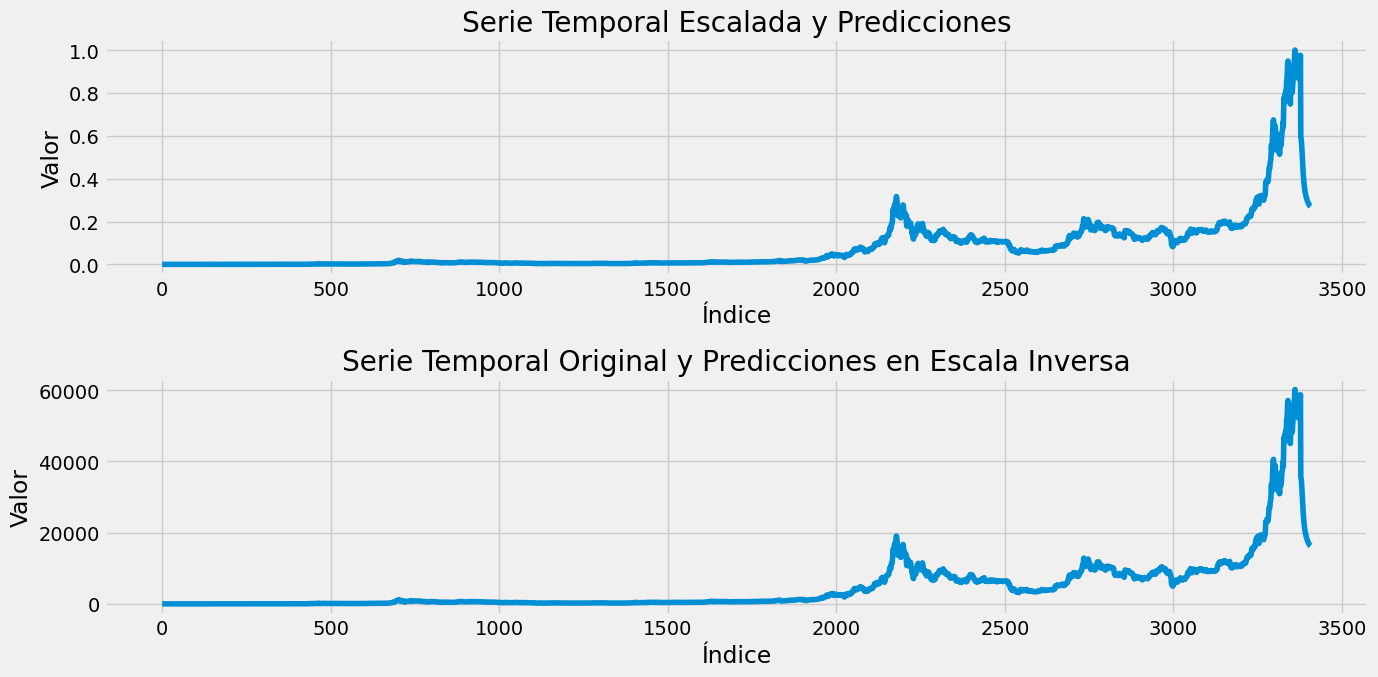

In [218]:
df_pre = price_series_scaled.tolist()
df_pre.extend(lst_output)

plt.figure(figsize=(14, 7))

# Gráfico de la serie temporal escalada y predicciones
plt.subplot(2, 1, 1)
plt.plot(df_pre)
plt.title('Serie Temporal Escalada y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

# Convertir las predicciones inversas a escala original
df_invscaled = scaler.inverse_transform(df_pre)

# Gráfico de la serie temporal original y predicciones en escala inversa
plt.subplot(2, 1, 2)
plt.plot(df_invscaled)
plt.title('Serie Temporal Original y Predicciones en Escala Inversa')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()


Podemos observar que si bien, tiene mejores metricas de error, las predicciones es solo una constante, por lo que no nos sirve

## CNN-LSTM

In [219]:
df = preprocess_data(df_daily)
df_train, df_test = split_data(df, "2020")
price_series = df_daily.reset_index().Weighted_Price.values

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

Tamaño de train: (2923, 42)
Tamaño de test: (455, 42)
(2822, 100, 1)
(354, 100, 1)


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Inicializar el modelo CNN-LSTM
model_cnn_lstm = Sequential()

# Capa convolucional 1D
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.2))

# Capa LSTM
model_cnn_lstm.add(LSTM(units=64, return_sequences=True))
model_cnn_lstm.add(Dropout(0.2))

# Capa LSTM
model_cnn_lstm.add(LSTM(units=32))
model_cnn_lstm.add(Dropout(0.2))

# Capas densas
model_cnn_lstm.add(Dense(128, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(64, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))

# Capa de salida
model_cnn_lstm.add(Dense(1))

# Compilar el modelo
model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [221]:
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.9040e-04 - val_loss: 0.0057
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0019 - val_loss: 0.0105
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0018 - val_loss: 0.0106
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0018 - val_loss: 0.0106
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss:

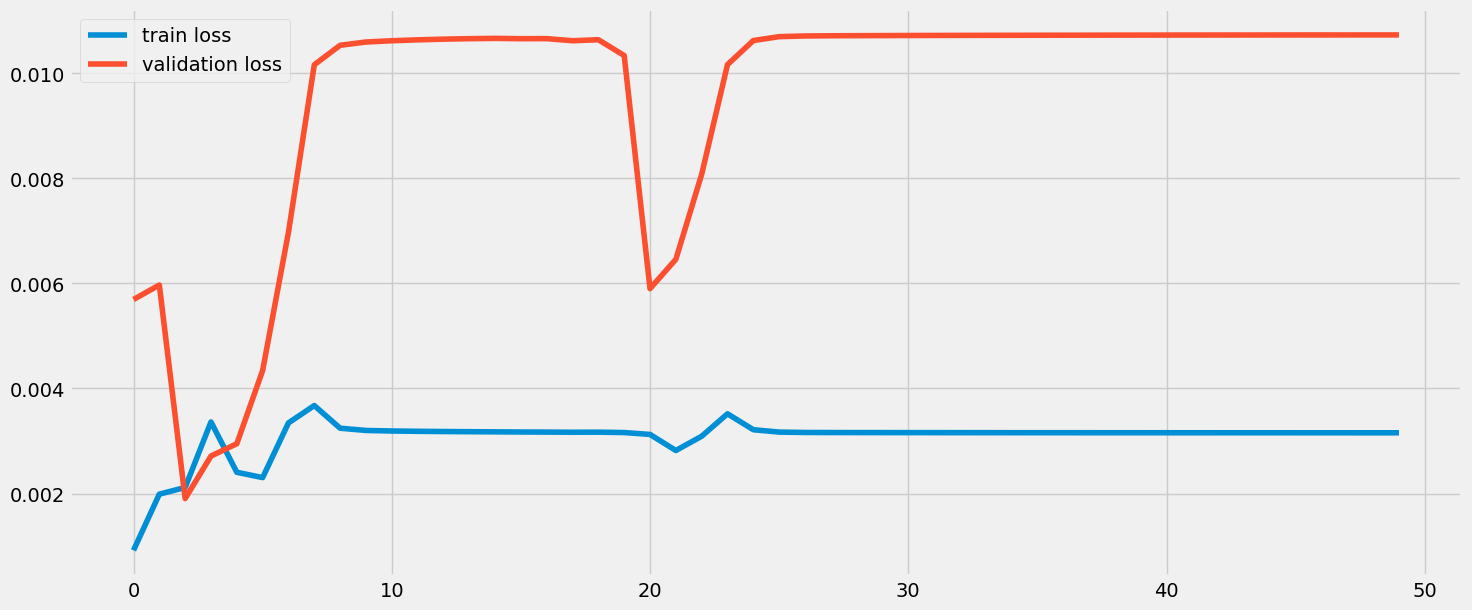

In [222]:
plt.figure(figsize=(16,7))
plt.plot(history_cnn_lstm.history["loss"], label= "train loss")
plt.plot(history_cnn_lstm.history["val_loss"], label= "validation loss")
plt.legend()

In [223]:
train_predict = model_cnn_lstm.predict(X_train)
test_predict = model_cnn_lstm.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [224]:
# Transformar a forma original

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

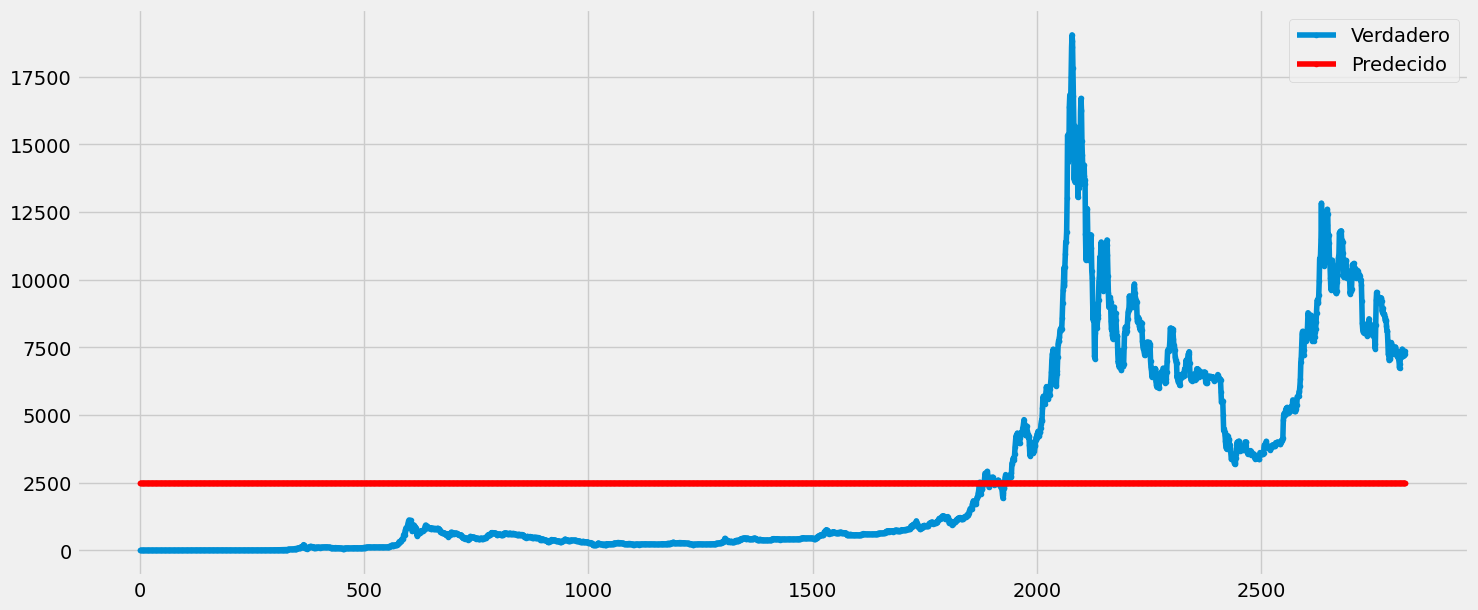

In [225]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Verdadero")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

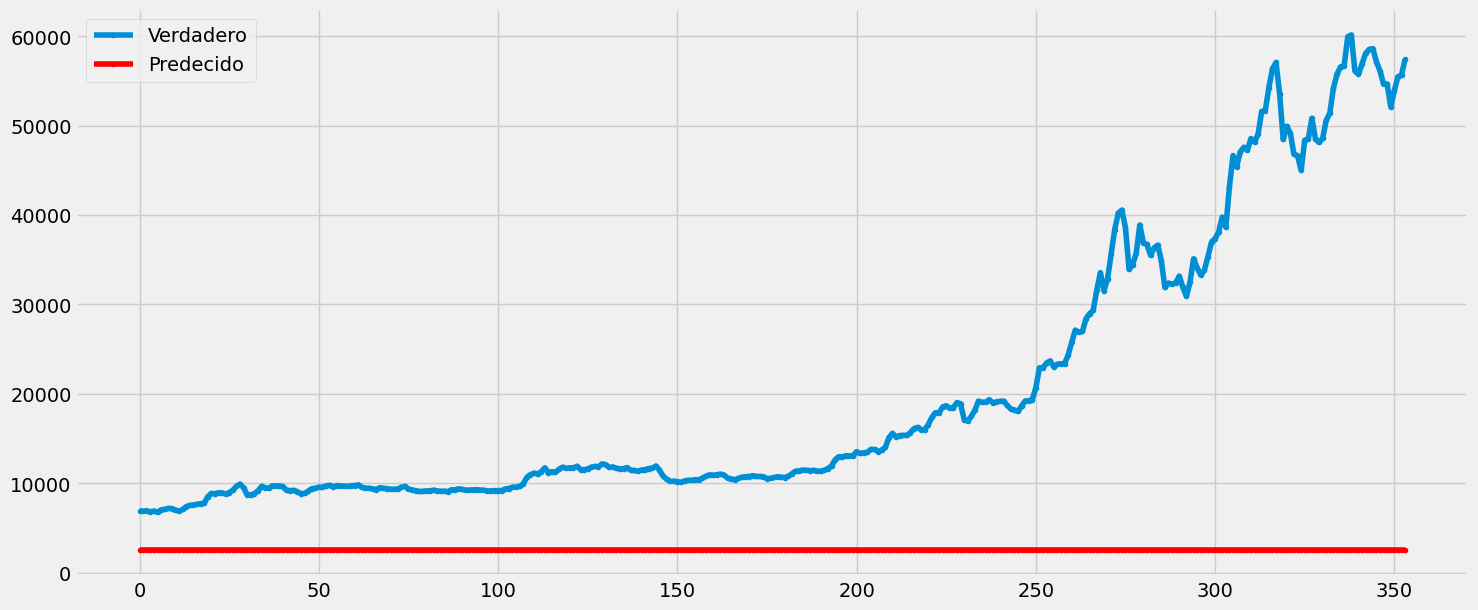

In [226]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Verdadero")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

In [227]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.06029931854376013
Train MAE: 0.22044250945034868
Test RMSE: 0.391068881417958
Test MAE: 0.5443936494686062


In [228]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

(1, 100)

In [229]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [230]:
# Prediccion para 100 dias
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5914163]
101
1 day input [0.38744365 0.38833459 0.38830672 0.40428088 0.42798745 0.45072704
 0.446669   0.44830619 0.47241375 0.48157502 0.48749811 0.52546763
 0.55783974 0.52448431 0.5462591  0.59243765 0.63801001 0.66870956
 0.67410605 0.64146684 0.56391965 0.57268081 0.59398843 0.64641459
 0.61329802 0.61030509 0.59006771 0.60392262 0.60892819 0.58009874
 0.53020362 0.53825102 0.53643942 0.53863494 0.55133316 0.53093016
 0.51374829 0.53986122 0.58350806 0.56640314 0.5533295  0.56203226
 0.5873166  0.61477949 0.62111945 0.63348877 0.66103712 0.64248671
 0.71746008 0.77561144 0.75459162 0.78228002 0.79095057 0.7852906
 0.8072611  0.80055514 0.8155225  0.85768935 0.85916256 0.90189599
 0.93687347 0.94869625 0.89067269 0.80548518 0.82983104 0.81690791
 0.77791889 0.77555779 0.7481737  0.80419557 0.8063987  0.84491463
 0.80684767 0.80012388 0.8074753  0.841116   0.85470131 0.90093345
 0.92699454 0.94058727 0.94280289 0.99649191 1.         0.93298091
 0.92676693 0.94603604 0.9657428  0

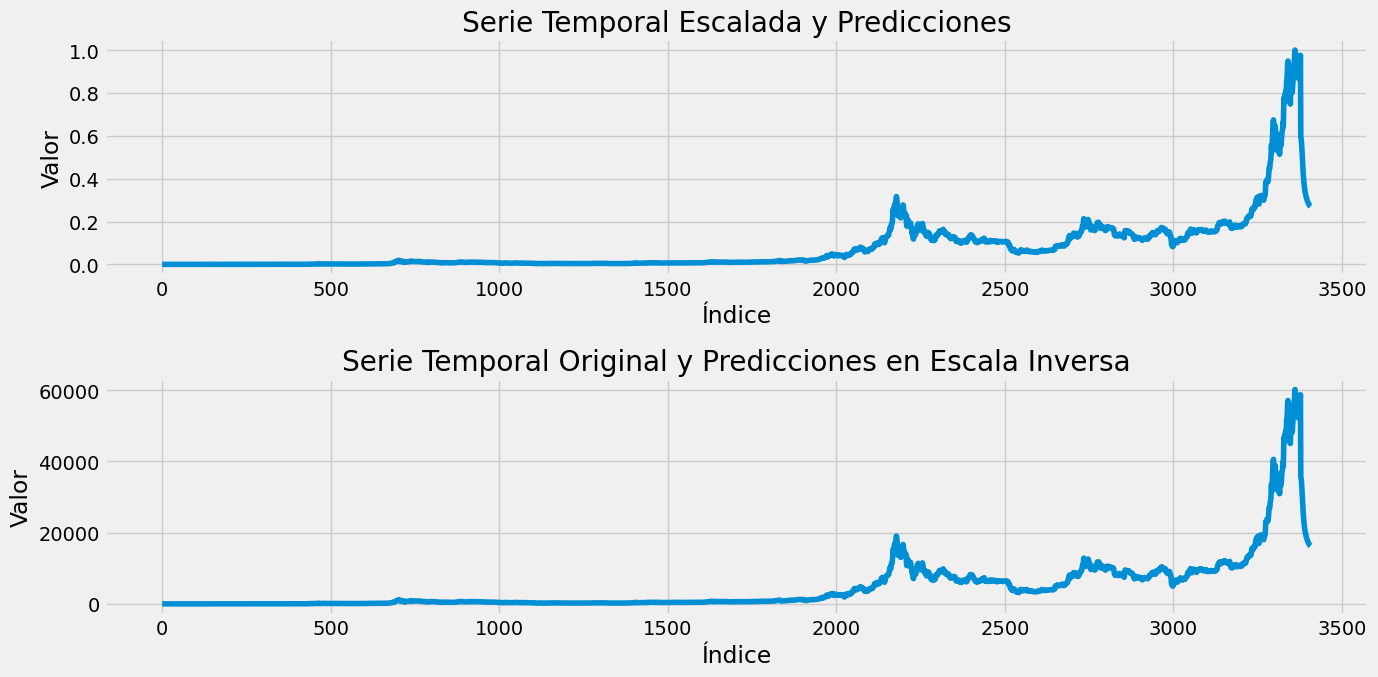

In [231]:
df_pre = price_series_scaled.tolist()
df_pre.extend(lst_output)

plt.figure(figsize=(14, 7))

# Gráfico de la serie temporal escalada y predicciones
plt.subplot(2, 1, 1)
plt.plot(df_pre)
plt.title('Serie Temporal Escalada y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

# Convertir las predicciones inversas a escala original
df_invscaled = scaler.inverse_transform(df_pre)

# Gráfico de la serie temporal original y predicciones en escala inversa
plt.subplot(2, 1, 2)
plt.plot(df_invscaled)
plt.title('Serie Temporal Original y Predicciones en Escala Inversa')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()



### 1.6 Visualización de resultados de simulación.
> Para cada uno de los temas del curso, realizar la estimación y predicción de errores de los algoritmos propuestos. Al final luego de obtener los resultados de cada tema realizar una comparación de los resultados lineales y no lineales y concluir los distintos resultados.

### 1.7 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.8 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

> - Bitcoin historical data. (2021, 11 abril). Kaggle. https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
> - Zielak (2021, April). Bitcoin Historical Data. Retrived April 03, 2024 from https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
> - Prabhakaran, S. (2023, 27 febrero). Interpolation in Python – How to interpolate missing data, formula and approaches. Machine Learning Plus. https://www.machinelearningplus.com/machine-learning/interpolation-in-python-how-to-interpolate-missing-data-formula-approaches/